In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv("adult_with_headers.csv")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [42]:
df.shape

(32561, 15)

In [43]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [44]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [46]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [47]:
numerical_features = df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']]

In [48]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(numerical_features)
minmax_scaled_df = pd.DataFrame(minmax_scaled_data, columns=numerical_features.columns)
print(minmax_scaled_df.head())

        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959  


In [49]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(numerical_features)

standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=numerical_features.columns)
print(standard_scaled_df.head())

        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  


In [50]:
df_scaled = df.copy()
df_scaled[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']] = minmax_scaled_df
df_scaled.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


In [51]:
'''
Discuss the scenarios where each scaling technique is preferred and why.
Algorithms like K-Nearest Neighbors (KNN), Support Vector Machines (SVM), or Neural Networks often benefit from MinMax scaling because they compute distances or gradients, and having features within the same range improves performance.
Algorithms like Logistic Regression, Linear Regression, Principal Component Analysis (PCA), and Gradient Descent-based models (e.g., Neural Networks) often assume the data is normally distributed. Standardization centers the data around 0 with a unit variance, aligning well with these assumptions.
'''

'\nDiscuss the scenarios where each scaling technique is preferred and why.\nAlgorithms like K-Nearest Neighbors (KNN), Support Vector Machines (SVM), or Neural Networks often benefit from MinMax scaling because they compute distances or gradients, and having features within the same range improves performance.\nAlgorithms like Logistic Regression, Linear Regression, Principal Component Analysis (PCA), and Gradient Descent-based models (e.g., Neural Networks) often assume the data is normally distributed. Standardization centers the data around 0 with a unit variance, aligning well with these assumptions.\n'

In [52]:
categorical_features = [
    'workclass', 'education', 'marital_status', 
    'occupation', 'relationship', 'race', 
    'sex', 'native_country', 'income'
]

In [53]:
# Counting unique values in each categorical feature
category_counts = df_scaled[categorical_features].nunique()
print(category_counts)

# Separating features based on the count
one_hot_features = category_counts[category_counts <= 5].index.tolist()
label_features = category_counts[category_counts > 5].index.tolist()


workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64


In [54]:
# Apply One-Hot Encoding
one_hot_encoded_data = pd.get_dummies(df_scaled[one_hot_features], drop_first=True)
df2 = df_scaled.drop(columns=one_hot_features).join(one_hot_encoded_data)

In [55]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Applying Label Encoding
df_label = df_scaled[label_features].apply(label_encoder.fit_transform)

# Adding label encoded data back to the dataset
df3 = df_scaled.drop(columns=label_features).join(df_label)


In [56]:
df_final = pd.concat([df2, df_label], axis=1)
print(df_final.head())

        age          workclass    fnlwgt   education  education_num  \
0  0.301370          State-gov  0.044302   Bachelors       0.800000   
1  0.452055   Self-emp-not-inc  0.048238   Bachelors       0.800000   
2  0.287671            Private  0.138113     HS-grad       0.533333   
3  0.493151            Private  0.151068        11th       0.400000   
4  0.150685            Private  0.221488   Bachelors       0.800000   

        marital_status          occupation    relationship  capital_gain  \
0        Never-married        Adm-clerical   Not-in-family       0.02174   
1   Married-civ-spouse     Exec-managerial         Husband       0.00000   
2             Divorced   Handlers-cleaners   Not-in-family       0.00000   
3   Married-civ-spouse   Handlers-cleaners         Husband       0.00000   
4   Married-civ-spouse      Prof-specialty            Wife       0.00000   

   capital_loss  ...  race_ Other race_ White  sex_ Male  income_ >50K  \
0           0.0  ...            0         

In [57]:
'''
one hot encoding
PROS:
- Avoids introducing ordinal relationships.
- Suitable for algorithms that do not assume order.
- Works well with categorical data in distance-based algorithms.
CONS:
- Increases dimensionality significantly.
- Memory-intensive for high-cardinality features.

label encoding
PROS:
- Simple and memory-efficient.
- Suitable for tree-based algorithms that handle categorical values well.
CONS:
- Assumes ordinal relationships that may not exist.
- Can mislead distance-based algorithms (e.g., KNN, SVM).
'''

'\none hot encoding\nPROS:\n- Avoids introducing ordinal relationships.\n- Suitable for algorithms that do not assume order.\n- Works well with categorical data in distance-based algorithms.\nCONS:\n- Increases dimensionality significantly.\n- Memory-intensive for high-cardinality features.\n\nlabel encoding\nPROS:\n- Simple and memory-efficient.\n- Suitable for tree-based algorithms that handle categorical values well.\nCONS:\n- Assumes ordinal relationships that may not exist.\n- Can mislead distance-based algorithms (e.g., KNN, SVM).\n'

In [58]:
# Creating new features
df_final['capital_diff']=df_final['capital_gain']-df_final['capital_loss']

bins=[0,30,50,100]
labels=['young', 'middle_aged', 'senior']
df_final['age_bracket'] = pd.cut(df_final['age'], bins=bins, labels=labels)

In [59]:
print(df_final.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'sex_ Male', 'income_ >50K', 'workclass', 'education', 'marital_status',
       'occupation', 'relationship', 'native_country', 'capital_diff',
       'age_bracket'],
      dtype='object')


In [60]:
numerical_features = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical features:", numerical_features)

Numerical features: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'capital_diff']


In [61]:
# applying transformation to skewed numerical features
skewness = df_final[numerical_features].skew()
print("Skewness of Numerical Features:\n", skewness)

Skewness of Numerical Features:
 age                0.558743
fnlwgt             1.446980
education_num     -0.311676
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
capital_diff       0.711646
dtype: float64


In [62]:
df_final['capital_gain_log'] = np.log1p(df_final['capital_gain'])  # log1p handles zeros
df_final['capital_loss_log'] = np.log1p(df_final['capital_loss'])

# Recalculating skewness to verify improvement
skewness_after = df_final[['capital_gain_log', 'capital_loss_log']].skew()
print("Skewness after log transformation:\n", skewness_after)

Skewness after log transformation:
 capital_gain_log    10.671437
capital_loss_log     4.494957
dtype: float64


In [63]:
df_final['capital_gain_sqrt'] = np.sqrt(df_final['capital_gain'])
df_final['capital_loss_sqrt'] = np.sqrt(df_final['capital_loss'])
skewness_after = df_final[['capital_gain_sqrt', 'capital_loss_sqrt']].skew()
print("Skewness after square root transformation:\n", skewness_after)

Skewness after square root transformation:
 capital_gain_sqrt    5.894582
capital_loss_sqrt    4.376357
dtype: float64


In [64]:
'''
-the square root transformation is a useful technique for moderately skewed distributions.
-square root is easy to interpret.
-Unlike logarithmic transformations that can only handle strictly positive values, square root transformations can handle zeros and still maintain data integrity.
'''

'\n-the square root transformation is a useful technique for moderately skewed distributions.\n-square root is easy to interpret.\n-Unlike logarithmic transformations that can only handle strictly positive values, square root transformations can handle zeros and still maintain data integrity.\n'

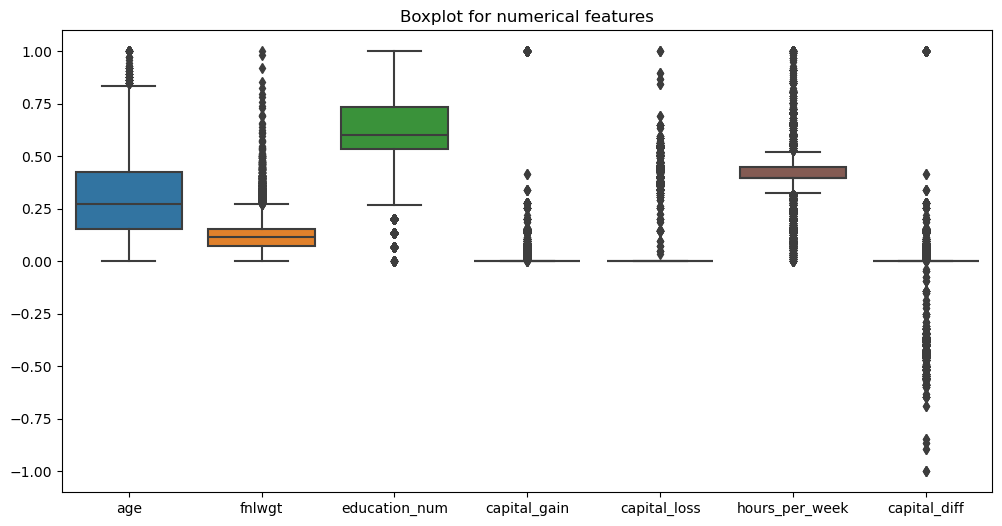

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_final[numerical_features])
plt.title('Boxplot for numerical features')
plt.show()

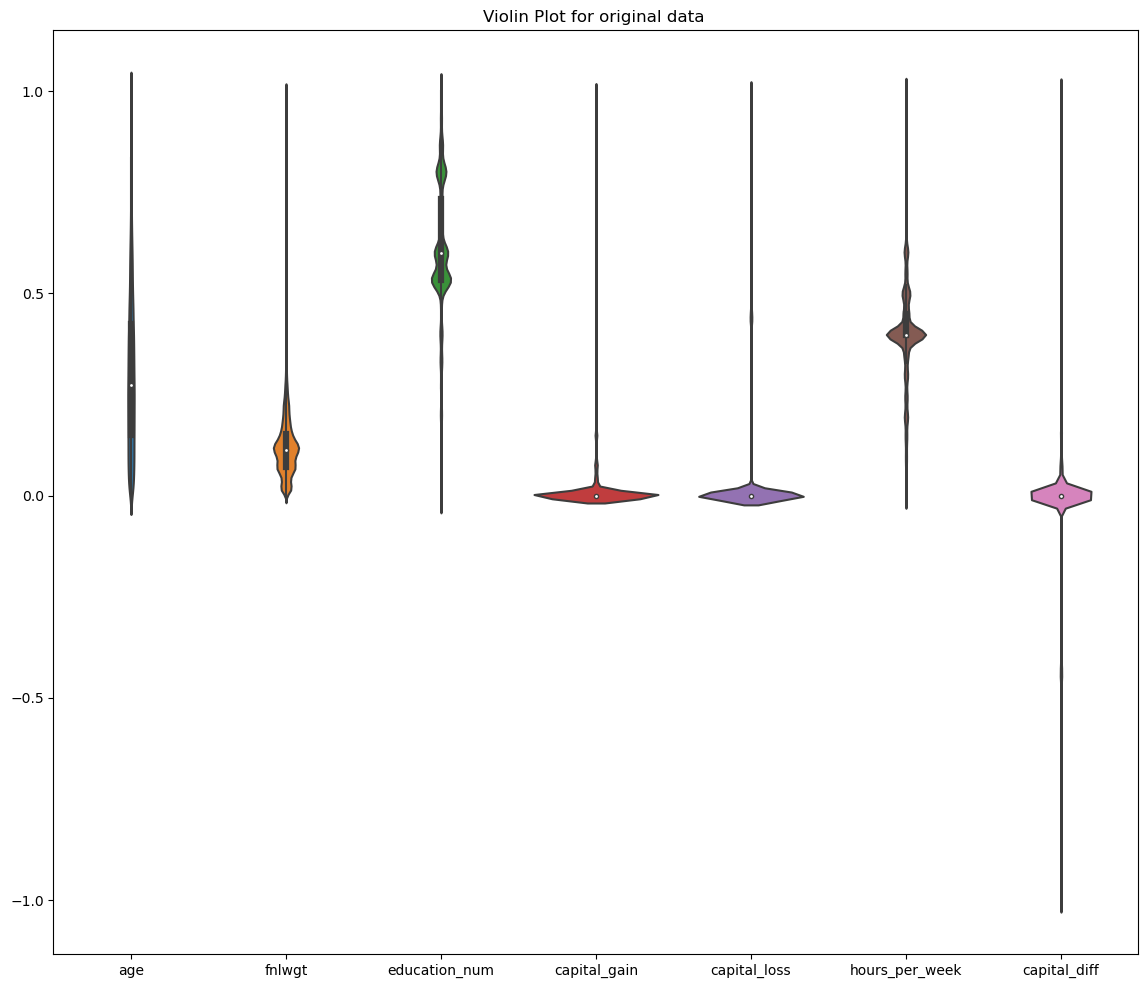

In [66]:
# Violin plot
plt.figure(figsize=(14, 12))
sns.violinplot(data=df_final[numerical_features])
plt.title('Violin Plot for original data ')
plt.show()

In [67]:
from sklearn.ensemble import IsolationForest

# Create the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # Set contamination to define the proportion of outliers

# Apply the model to detect outliers
outliers = model.fit_predict(df_final[numerical_features])

# Convert the output to boolean (1: inliers, -1: outliers)
df_final['outlier'] = outliers == -1

# Remove the outliers
df_no_outliers = df_final[df_final['outlier'] == False]

# Verify how many outliers were detected
outlier_count = (outliers == -1).sum()
print(f"Number of outliers detected: {outlier_count}")


C:\Users\KAUSHIK\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of outliers detected: 1627


Text(0.5, 1.0, 'Boxplot - Data Without Outliers')

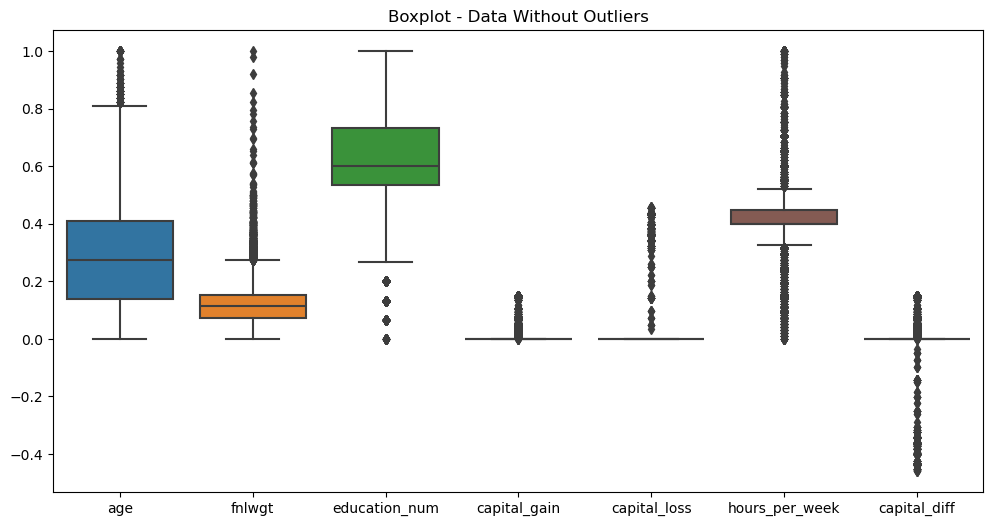

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[numerical_features])
plt.title('Boxplot - Data Without Outliers')

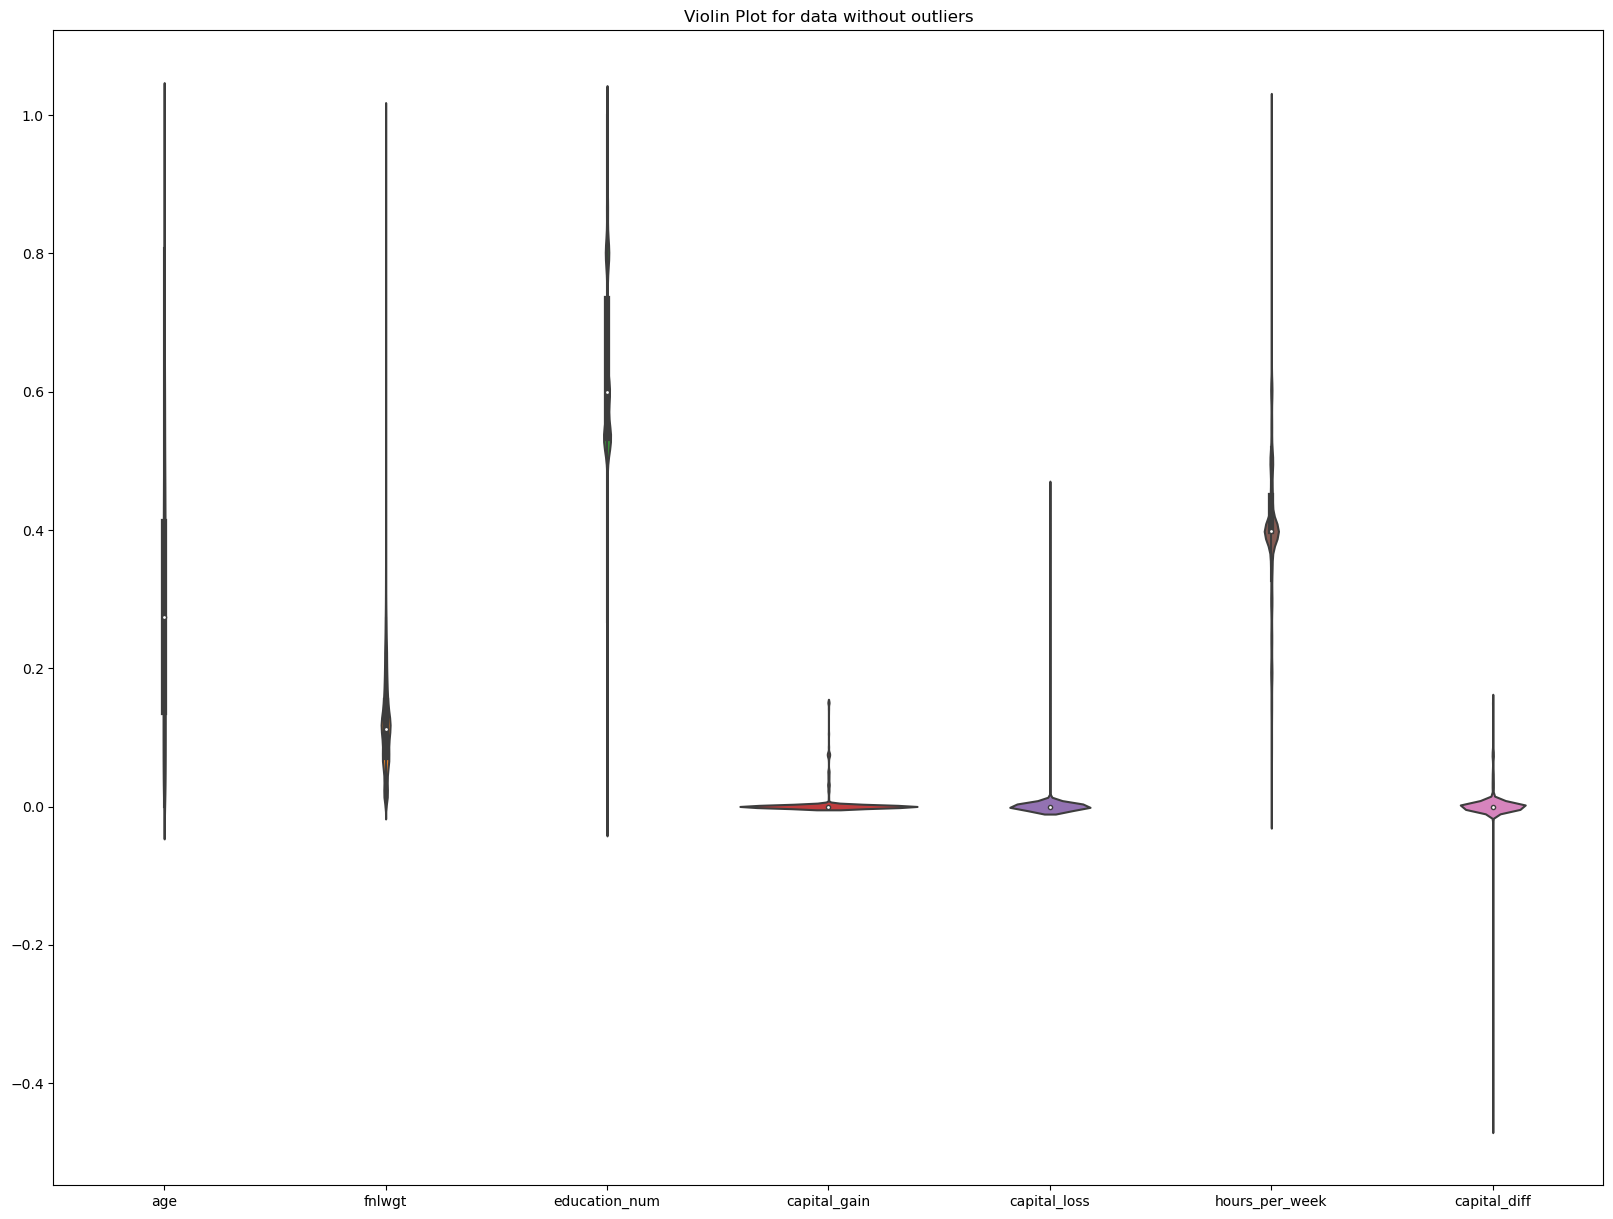

In [69]:
# Violin plot to visualize capital_gain and capital_loss distributions
plt.figure(figsize=(20, 15))
sns.violinplot(data=df_no_outliers[numerical_features])
plt.title('Violin Plot for data without outliers')
plt.show()


In [70]:
pip install ppscore


Note: you may need to restart the kernel to use updated packages.


In [71]:
print(df_no_outliers.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'sex_ Male', 'income_ >50K', 'workclass', 'education', 'marital_status',
       'occupation', 'relationship', 'native_country', 'capital_diff',
       'age_bracket', 'capital_gain_log', 'capital_loss_log',
       'capital_gain_sqrt', 'capital_loss_sqrt', 'outlier'],
      dtype='object')


In [73]:
# Find the first index of 'workclass' and 'education' and drop them
df_final2 = df_no_outliers.drop(columns=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country'])

# Check the columns after dropping the first occurrence
print(df_final2.columns)


Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Male', 'income_ >50K',
       'capital_diff', 'age_bracket', 'capital_gain_log', 'capital_loss_log',
       'capital_gain_sqrt', 'capital_loss_sqrt', 'outlier'],
      dtype='object')


In [74]:
import ppscore as pps

# Calculate the PPS for the entire dataset
pps_matrix = pps.matrix(df_final2)

# Display the matrix
print(pps_matrix)

C:\Users\KAUSHIK\anaconda3\Lib\site-packages\ppscore\calculation.py:104: RuntimeWarning: invalid value encountered in scalar divide
  return f1_diff / scale_range  # 0.1/0.3 = 0.33
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\ppscore\calculation.py:104: RuntimeWarning: invalid value encountered in scalar divide
  return f1_diff / scale_range  # 0.1/0.3 = 0.33
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\ppscore\calculation.py:104: RuntimeWarning: invalid value encountered in scalar divide
  return f1_diff / scale_range  # 0.1/0.3 = 0.33
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\ppscore\calculation.py:104: RuntimeWarning: invalid value encountered in scalar divide
  return f1_diff / scale_range  # 0.1/0.3 = 0.33
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\ppscore\calculation.py:104: RuntimeWarning: invalid value encountered in scalar divide
  return f1_diff / scale_range  # 0.1/0.3 = 0.33
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\ppscore\calculation.py:104: RuntimeWarning: invali

           x                  y  ppscore            case  is_valid_score  \
0        age                age      1.0  predict_itself            True   
1        age             fnlwgt      0.0      regression            True   
2        age      education_num      0.0      regression            True   
3        age       capital_gain      0.0      regression            True   
4        age       capital_loss      0.0      regression            True   
..       ...                ...      ...             ...             ...   
356  outlier   capital_gain_log      0.0      regression            True   
357  outlier   capital_loss_log      0.0      regression            True   
358  outlier  capital_gain_sqrt      0.0      regression            True   
359  outlier  capital_loss_sqrt      0.0      regression            True   
360  outlier            outlier      1.0  predict_itself            True   

                  metric  baseline_score  model_score                    model  
0     

C:\Users\KAUSHIK\anaconda3\Lib\site-packages\ppscore\calculation.py:104: RuntimeWarning: invalid value encountered in scalar divide
  return f1_diff / scale_range  # 0.1/0.3 = 0.33


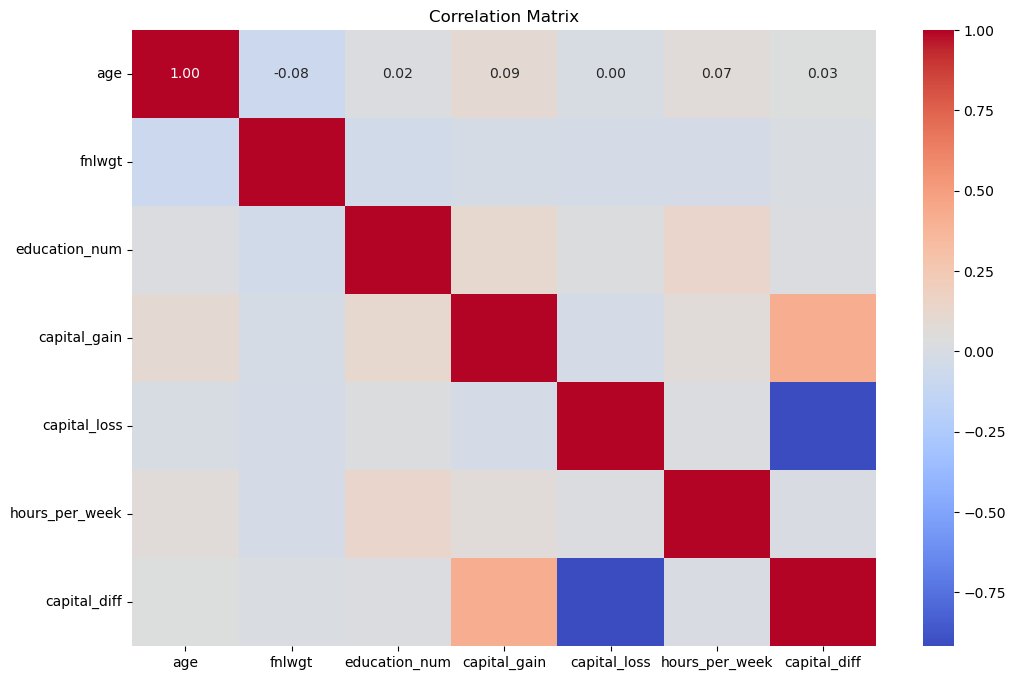

In [75]:
# Calculate correlation matrix
correlation_matrix = df_final2[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

C:\Users\KAUSHIK\anaconda3\Lib\site-packages\ppscore\calculation.py:104: RuntimeWarning: invalid value encountered in scalar divide
  return f1_diff / scale_range  # 0.1/0.3 = 0.33
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\ppscore\calculation.py:104: RuntimeWarning: invalid value encountered in scalar divide
  return f1_diff / scale_range  # 0.1/0.3 = 0.33
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\ppscore\calculation.py:104: RuntimeWarning: invalid value encountered in scalar divide
  return f1_diff / scale_range  # 0.1/0.3 = 0.33
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\ppscore\calculation.py:104: RuntimeWarning: invalid value encountered in scalar divide
  return f1_diff / scale_range  # 0.1/0.3 = 0.33
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\ppscore\calculation.py:104: RuntimeWarning: invalid value encountered in scalar divide
  return f1_diff / scale_range  # 0.1/0.3 = 0.33
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\ppscore\calculation.py:104: RuntimeWarning: invali

Text(0.5, 1.0, 'PPS Heatmap')

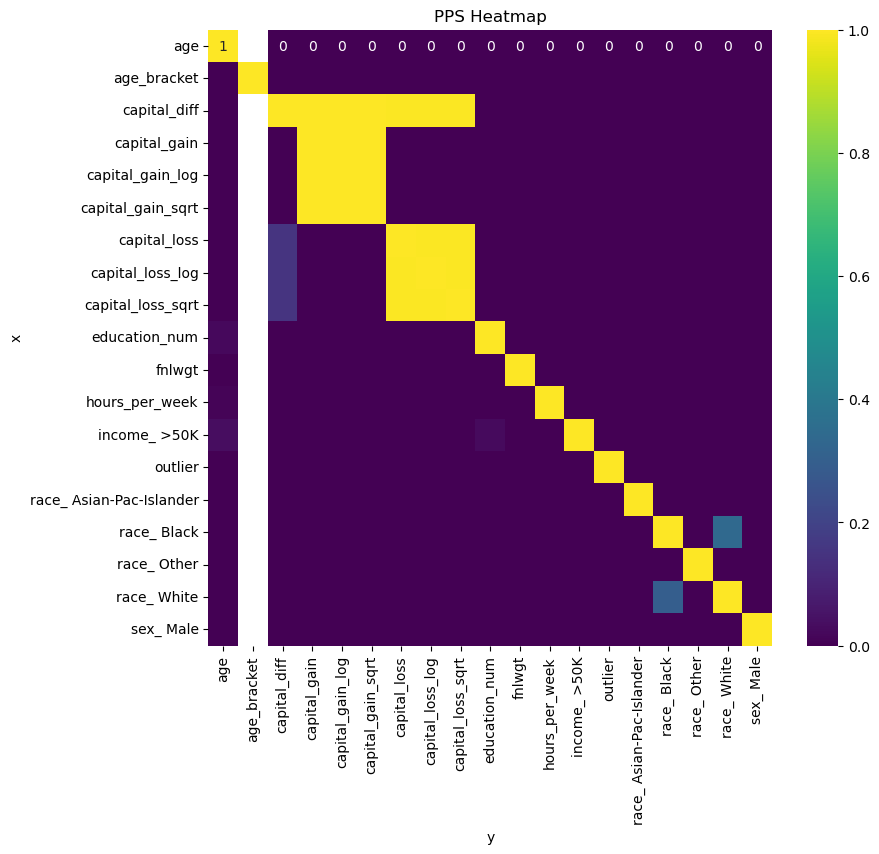

In [76]:
pps_matrix = pps.matrix(df_final2)

# Create the PPS heatmap
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.heatmap(pps_matrix.pivot(index='x', columns='y', values='ppscore'), annot=True, cmap='viridis', cbar=True)
plt.title("PPS Heatmap")

In [77]:
'''
PPS identifies non-linear relationships, which are often missed by correlation
useful for understanding predictive power of one feature on another.
Features like capital_gain and capital_gain_log show a high PPS score, indicating strong predictive relationships.
'''

'\nPPS identifies non-linear relationships, which are often missed by correlation\nuseful for understanding predictive power of one feature on another.\nFeatures like capital_gain and capital_gain_log show a high PPS score, indicating strong predictive relationships.\n'